In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pprint import pprint
import itertools

import cp
import base

## Generate noisy, non-negative data

In [2]:
np.random.seed(0)
sizes = [20, 40, 30]
rank = 3

tensor, factors, norms, noise = cp.create_non_negative_data(sizes, rank, noise_factor=0.9)

## Decomposition with no bounds

In [3]:
cp_factors, result, _, log = cp.cp_opt(tensor, method='L-BFGS-B', rank=rank, 
                                                     init='random', gtol=1e-15)

print(result.message)
print(f'F(x): {result.fun}')
print(f'Number of iterations: {result.nit}')
print(f'Number of function evaluations: {result.nfev}')

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
F(x): 2.2277109896921528
Number of iterations: 70
Number of function evaluations: 80


In [4]:
score, best_permutation = cp.factor_match_score(factors, cp_factors, weight_penalty=True)

print(f'Factor match score: {score}')
print(f'Best match permutation: {best_permutation}')

Factor match score: 0.8295448238011135
Best match permutation: (2, 1, 0)


## Nonnegative decomposition

In [5]:
lower_bounds = [0, 0, 0]
cp_factors_nn, result_nn, _, log_nn = cp.cp_opt(tensor, method='L-BFGS-B', 
                                                     lower_bounds=0, rank=rank, 
                                                     init='random', gtol=1e-15)

print(result_nn.message)
print(f'F(x): {result_nn.fun}')
print(f'Number of iterations: {result_nn.nit}')
print(f'Number of function evaluations: {result_nn.nfev}')

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
F(x): 2.228490383430779
Number of iterations: 50
Number of function evaluations: 54


In [6]:
score_nn, best_permutation_nn = cp.factor_match_score(factors, cp_factors_nn, weight_penalty=True)

print(f'Factor match score: {score_nn}')
print(f'Best match permutation: {best_permutation_nn}')

Factor match score: 0.9095186452650058
Best match permutation: (1, 0, 2)


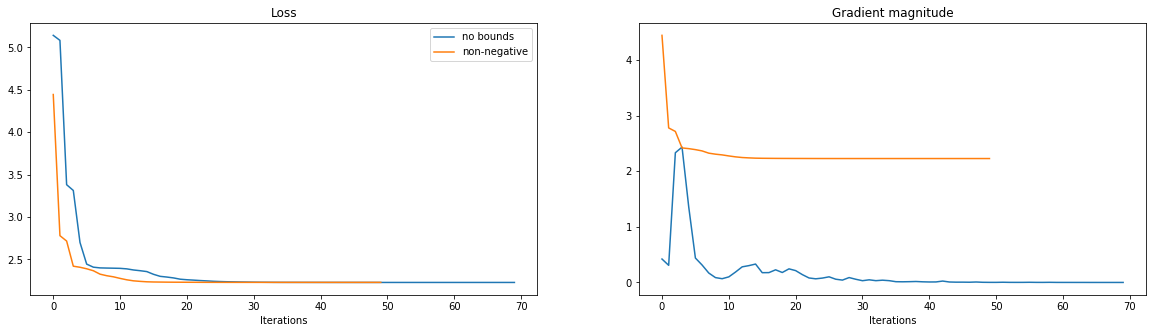

In [7]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(log.loss_values, label='no bounds')
ax1.plot(log_nn.loss_values, label='non-negative')
ax1.set_title('Loss')
ax1.set_xlabel('Iterations')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(log.gradient_values, label='no bounds')
ax2.plot(log_nn.loss_values, label='non-negative')
ax2.set_title('Gradient magnitude')
ax2.set_xlabel('Iterations')
ax1.legend()

#ax1.set_yscale('log')
#ax2.set_yscale('log')

plt.show()

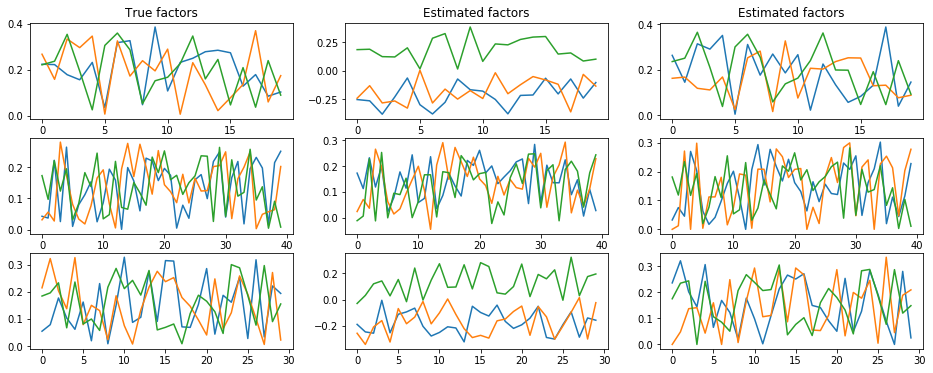

In [8]:
fig, axes = plt.subplots(len(sizes), 3, figsize=(16, 6))
for i in range(len(factors)):
    axes[i][0].plot(factors[i], '-')
    axes[0][0].set_title('True factors')
    
    axes[i][1].plot(cp_factors[i], '-')
    axes[0][1].set_title('Estimated factors')
    
    axes[i][2].plot(cp_factors_nn[i], '-')
    axes[0][2].set_title('Estimated factors')

plt.show()

In [9]:
f1, s1, n1 = cp.prepare_for_comparison(factors)
f2, s2, n2 = cp.prepare_for_comparison(cp.permute_factors(best_permutation, cp_factors))
f3, s3, n3 = cp.prepare_for_comparison(cp.permute_factors(best_permutation_nn, cp_factors_nn))

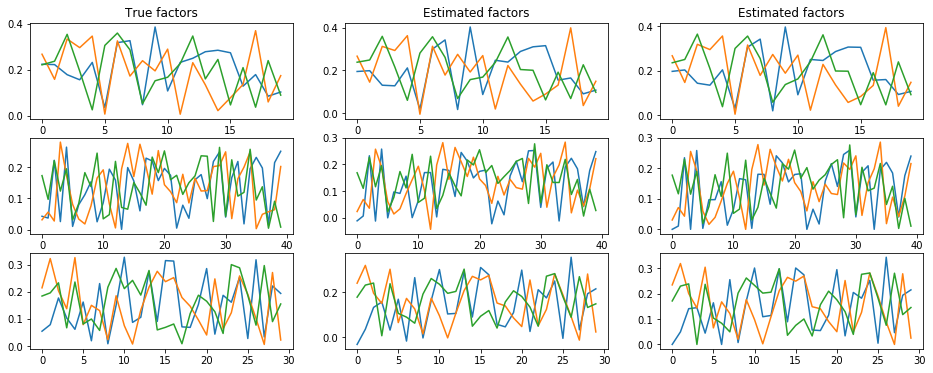

In [10]:
fig, axes = plt.subplots(len(sizes), 3, figsize=(16, 6))
for i in range(len(factors)):
    axes[i][0].plot(f1[i], '-')
    axes[0][0].set_title('True factors')
    
    axes[i][1].plot(f2[i], '-')
    axes[0][1].set_title('Estimated factors')
    
    axes[i][2].plot(f3[i], '-')
    axes[0][2].set_title('Estimated factors')

plt.show()

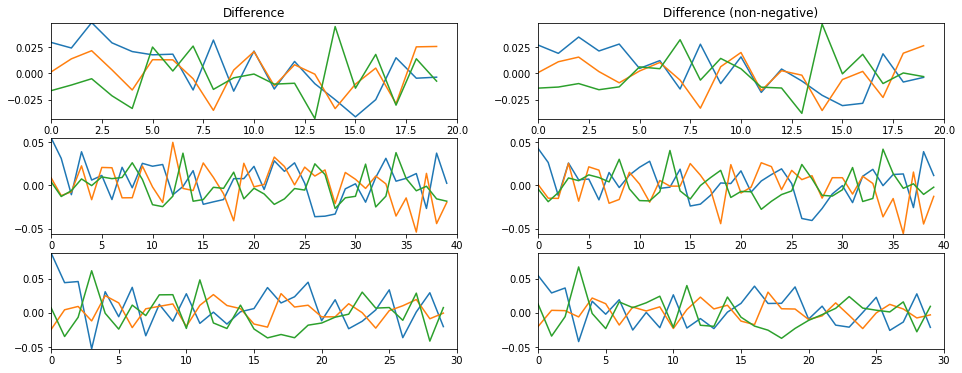

In [11]:
fig, axes = plt.subplots(len(sizes), 2, figsize=(16, 6))

axes[0][0].set_title('Difference')
axes[0][1].set_title('Difference (non-negative)')

for i in range(len(factors)):
    axes[i][0].plot(f1[i]-f2[i], '-')
    axes[i][1].plot(f1[i]-f3[i], '-')
    
    min_val = min((f1[i]-f2[i]).min(), (f1[i]-f3[i]).min())
    max_val = max((f1[i]-f2[i]).max(), (f1[i]-f3[i]).max())
    
    axes[i][0].axis([0, len(f1[i]), min_val, max_val])
    
    axes[i][1].axis([0, len(f1[i]), min_val, max_val])   
    
plt.show()

In [14]:
lower_bounds = [0, np.inf, np.inf]

cp_factors_nn, result_nn, _, log_nn = cp.cp_opt(tensor, method='L-BFGS-B', 

                                                     lower_bounds=lower_bounds, rank=rank, 

                                                     init='random', gtol=1e-15)

print(result_nn.message)
print(f'F(x): {result_nn.fun}')

print(f'Number of iterations: {result_nn.nit}')

print(f'Number of function evaluations: {result_nn.nfev}')

b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'

b'ABNORMAL_TERMINATION_IN_LNSRCH'
F(x): nan
Number of iterations: 0
Number of function evaluations: 21


/home/marie/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:1120: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis,:], out)


b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'

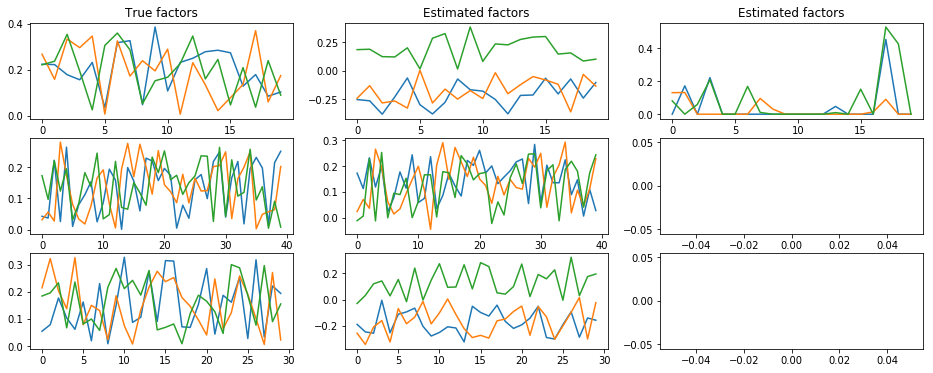

In [15]:
fig, axes = plt.subplots(len(sizes), 3, figsize=(16, 6))
for i in range(len(factors)):
    axes[i][0].plot(factors[i], '-')
    axes[0][0].set_title('True factors')
    
    axes[i][1].plot(cp_factors[i], '-')
    axes[0][1].set_title('Estimated factors')
    
    axes[i][2].plot(cp_factors_nn[i], '-')
    axes[0][2].set_title('Estimated factors')

plt.show()